In [2]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.linalg as la

from src.structured_random_features.src.models.weights import V1_weights

# Packages for fft and fitting data
from scipy import fftpack as fft
from sklearn.linear_model import Lasso

# Package for importing image representation
from PIL import Image, ImageOps

from src.V1_Compress import generate_Y, compress
import pandas as pd
import itertools
import dask
from dask.distributed import Client, progress
import seaborn as sns
import time
import os.path

In [3]:
def opt_hyperparams(data): 
    # Try to use pd group_by to group repetition and get avg
    
    # Among those average, get the lowest error hyperparam
    
    return pd.DataFrame(data).sort_values(by = 'error', ascending = True).head(1)

In [4]:
# def run_sim(rep, alpha, num, sz, freq, img_arr = img_arr):
#     img_arr = np.array([img_arr]).squeeze()
#     dim = img_arr.shape
#     n, m = dim

#     # Generate V1 weight with y
#     W = V1_weights(num, dim, sz, freq) 
#     y = generate_Y(W, img_arr)
#     W_model = W.reshape(num, n, m)
    
#     # Call function and calculate error
#     theta, reform, s = compress(W_model, y, alp)
#     error = np.linalg.norm(img - reform, 'fro') / np.sqrt(m*n)
    
#     return error, theta, reform, s

In [5]:
# #DF version after looking at Desk method

# # Set up hyperparameters that would affect results
# param = []
# params = []
# # result = []
# alpha = np.logspace(-3, 3, 7)
# rep = np.arange(10)
# num_cell = [100, 200, 500]
# cell_sz = [2, 5, 7]
# sparse_freq = [1, 2, 5]

# # Load Image
# image_nm = 'image/tree_part1.jpg'
# img = Image.open(image_nm)
# img = ImageOps.grayscale(img)
# img_arr = np.asarray(img)



# search_list = [rep, alpha, num_cell, cell_sz, sparse_freq]
# search = list(itertools.product(*search_list))             
# search_df = pd.DataFrame(search, columns= [ 'rep', 'alp', 'num_cell', 'cell_sz', 'sparse_freq'])
# print(search_df.head())

# # Call dask
# client = Client()
# client

# # counter = 0; # Keep track of number of iteration. Debugging method
# for p in search_df.values:
#     param = dask.delayed(run_sim)(*p)
#     params.append(param)
# #     counter+=1
# #     print("iteration: ", counter)
    
# futures = dask.persist(*params)
# progress(futures)

# # print("Before computing the process")
# # results = dask.compute(*process)
# # print("Computing over")
# # results = pd.DataFrame(results, columns = ['error', 'theta', 'reform', 's'])
# # print("results DataFramed")



# # Load V1 weight
# # dim = img_arr.shape
# # n, m = dim

# # # use itertool to reduce amount of for loops
# # for row in itertools.product(*search_list.values()):
# #     product = dict(zip(search_list.keys(), row))
# #     epo, alp, num, sz, freq = product.values()
# #     W = V1_weights(num, dim, sz, freq) 
# #     y = generate_Y(W, img_arr)
# #     W_model = W.reshape(num, n, m)
    
# #     theta, reform, s = compress(W_model, y, alp)
# #     error = np.linalg.norm(img - reform, 'fro') / np.sqrt(m*n)
    
# #     params.append({'repetition' : rep,
# #                    'num_cell' : num,
# #                    'cell_size' : sz,
# #                    'sparse_freq' : freq,
# #                    'alpha': alp,
# #                    'error' : error
# #                   })
# # opt_param = opt_hyperparams(params)

In [6]:
# This works but other ways does not work at all for no reason

params = []
reformed = []
alpha = np.logspace(-3, 3, 7)
rep = np.arange(10)
results = []

# Load Image
image_nm = 'image/tree_part1.jpg'
img = Image.open(image_nm)
img = ImageOps.grayscale(img)
img_arr = np.asarray(img)


# Load V1 weight
search_list = {'repetition': rep,
               'alpha': alpha,
               'num_cell': [100, 200, 500],
               'cell_sz': [2, 5, 7],
               'sparse_freq': [1, 2, 5]
              }

dim = img_arr.shape
n, m = dim

# use itertool to reduce amount of for loops
for row in itertools.product(*search_list.values()):
    product = dict(zip(search_list.keys(), row))
    rep, alp, num, sz, freq = product.values()
    W = V1_weights(num, dim, sz, freq) 
    y = generate_Y(W, img_arr)
    W_model = W.reshape(num, n, m)
    
    theta, reform, s = compress(W_model, y, alp)
    error = np.linalg.norm(img - reform, 'fro') / np.sqrt(m*n)
    
    
    
    params.append({'repetition' : rep,
                   'num_cell' : num,
                   'cell_size' : sz,
                   'sparse_freq' : freq,
                   'alpha': alp,
                   'error' : error
                  })
    
    
    results.append({'s' : s,
                    'theta' : theta,
                    'reform' : reform
                   })
# opt_param = opt_hyperparams(params)

In [6]:
#Saving 
save_path = os.path.join('./result/')
params_df = pd.DataFrame(params)
results_df = pd.DataFrame(results)

total_df = params_df.join(results_df)

params_df.to_csv(os.path.join(save_path, "param_" + "_".join(str.split(time.ctime().replace(":", "_"))) + ".csv"))
results_df.to_csv(os.path.join(save_path, "results_" + "_".join(str.split(time.ctime().replace(":", "_"))) + ".csv"))
total_df.to_csv(os.path.join(save_path, "total_" + "_".join(str.split(time.ctime().replace(":", "_"))) + ".csv"))


In [105]:
# Work on previously saved data
params_df = pd.read_csv('result//param_Mon_May_23_21_46_49_2022.csv')
results_df = pd.read_csv('result//results_Mon_May_23_21_46_49_2022.csv')
total_df = pd.read_csv('result//total_Mon_May_23_21_47_07_2022.csv')

In [106]:
params_df

,Unnamed: 0,repetition,num_cell,cell_size,sparse_freq,alpha,error
0,0,0,100,2,1,0.001,118.552402
1,1,0,100,2,2,0.001,1517.257701
2,2,0,100,2,5,0.001,2642.888029
3,3,0,100,5,1,0.001,122.698407
4,4,0,100,5,2,0.001,1334.387078
...,...,...,...,...,...,...,...
1885,1885,9,500,5,2,1000.000,28.332152
1886,1886,9,500,5,5,1000.000,29.203209
1887,1887,9,500,7,1,1000.000,37.352217
1888,1888,9,500,7,2,1000.000,30.094042


,Unnamed: 0,repetition,num_cell,cell_size,sparse_freq,alpha,error
1564,1564,8,500,7,2,0.01,12.274121


In [ ]:
W

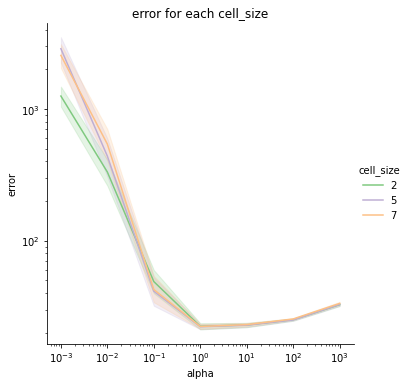

In [65]:
fig = sns.relplot(data = params_df, x = 'alpha', y = 'error', kind='line', palette='Accent', hue = 'cell_size')
fig.set(yscale='log')
fig.set(xscale='log')
fig.set(title='error for each cell_size')

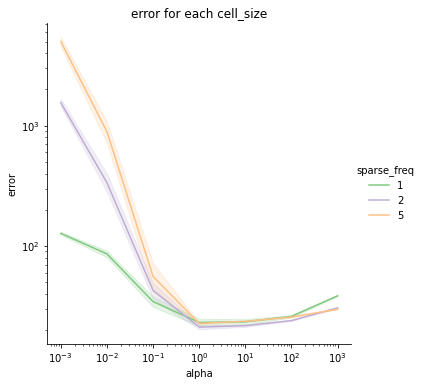

In [67]:
fig = sns.relplot(data = params_df, x = 'alpha', y = 'error', kind='line', palette='Accent', hue = 'sparse_freq')
fig.set(yscale='log')
fig.set(xscale='log')
fig.set(title='error for each cell_size')

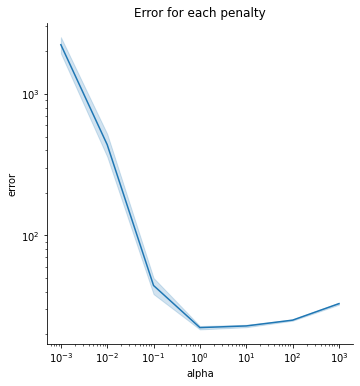

In [59]:
fig = sns.relplot(data = params_df, x = 'alpha', y = 'error', kind='line')
fig.set(yscale='log')
fig.set(xscale='log')
fig.set(title='Error for each penalty')

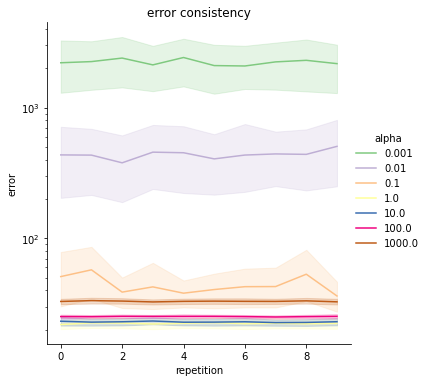

In [63]:
# To show how consistent randomly generated V1 weight would be for each rep. it should be about same for each repetition


fig = sns.relplot(data = params_df, x = 'repetition', y = 'error', kind='line', palette='Accent', hue = 'alpha')
fig.set(title='error consistency')
fig.set(yscale='log')

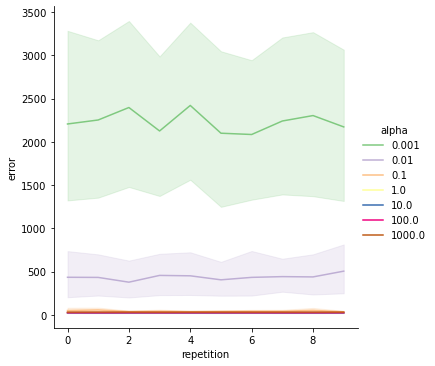

In [60]:
sns.relplot(data = params_df, x = 'repetition', y = 'error', kind='line', palette='Accent', hue = 'alpha')

In [ ]:
plt.figure(figsize=(3, 3))
fig = sns.relplot()

In [19]:
params = []
# result = []
alpha = np.logspace(-3, 3, 7)
rep = np.arange(10)
num_cell = [100, 200, 500]
cell_sz = [2, 5, 7]
sparse_freq = [1, 2, 5]

# Load Image
image_nm = 'image/tree_part1.jpg'
img = Image.open(image_nm)
img = ImageOps.grayscale(img)
img_arr = np.asarray(img)

dim = img_arr.shape
n, m = dim

# Load V1 weight
# search_list = {'repetition': rep,
#                'alpha': alpha,
#                'num_cell': ,
#                'cell_sz': [2, 5, 7],
#                'sparse_freq': [1, 2, 5]
#               }


search_list = [rep, alpha, num_cell, cell_sz, sparse_freq]
search = list(itertools.product(*search_list))             
search_df = pd.DataFrame(search, columns= [ 'rep', 'alp', 'num_cell', 'cell_sz', 'sparse_freq'])


result = pd.DataFrame(columns=['s', 'theta', 'reform', 'error'])
# use itertool to reduce amount of for loops
# for row in itertools.product(*search_list.values()):
print("start for loop")
for rep, alp, num, sz, freq in list(search_df.values):
    print(rep, alp, num, sz, freq, dim[0], dim[1])
    W = V1_weights(num, dim, sz, freq) 
    y = generate_Y(W, img_arr)
    W_model = W.reshape(num, n, m)

    theta, reform, s = compress(W_model, y, alp)
    error = np.linalg.norm(img - reform, 'fro') / np.sqrt(m*n)
    
#     params.append({'repetition' : rep,
#                    'num_cell' : num,
#                    'cell_size' : sz,
#                    'sparse_freq' : freq,
#                    'alpha': alp,
#                    'error' : error
#                   })
# opt_param = opt_hyperparams(params)

start for loop
0.0 0.001 100.0 2.0 1.0 30 30


IndexError: invalid index to scalar variable.

In [ ]:
V1_reform = opt_param['reform'].to_numpy()[0]
plt.figure(figsize= (3,3))
plt.axis('off')
plt.imshow(V1_reform)
# use format string to name it with params
plt.savefig("tree_reconstruction.png", dpi = 200)

# Try grayscale color map

# Store original image of gray scale

In [ ]:
params

In [ ]:
alpha = np.arange(1, 401, 5)
search_list = {'alpha': alpha,
          'cell_sz': [2, 5, 7],
          'num_cell': [100, 200, 500],
          'sparse_freq': [1, 2, 5]}
search_list

for row in itertools.product(*search_list.values()):
    product = dict(zip(search_list.keys(), row))
#     print(dict(product))
#     print(dict(product).values()[0])

In [ ]:
#Compress Sensing on function

In [180]:
## Check if this function is applicable to regular compress sensing
classical_img = Image.open("image/tree_part1.jpg")
classical_img = ImageOps.grayscale(classical_img)
classical_arr = np.asarray(classical_img)
cn, cm = classical_arr.shape
print(cn, cm)
classical_samp = 500 #np.floor (cn * cm * 0.20).astype(int)


30 30


array([[213, 210, 216, 216, 206, 208, 216, 214, 193, 216, 233, 178, 196,
        141, 117, 134, 176, 112, 167, 160, 186, 213, 190, 177, 203, 182,
        195, 202, 185, 180],
       [220, 206, 204, 208, 208, 214, 215, 204, 228, 227, 203, 159, 174,
        142,  93,  95, 115, 122, 144, 163, 181, 158, 205, 163, 165, 193,
        201, 190, 187, 179],
       [207, 195, 196, 203, 207, 214, 216, 204, 199, 184, 145, 131, 164,
        171, 115, 105,  70, 102, 101, 117, 125,  86, 147, 109, 143, 204,
        196, 176, 195, 194],
       [190, 187, 197, 202, 195, 195, 197, 189, 192, 160, 111,  75, 106,
        124, 100, 101, 108,  96,  96,  93,  93, 100,  99, 117, 146, 189,
        174, 170, 192, 203],
       [198, 194, 200, 202, 190, 180, 169, 152, 183, 172, 167, 112, 129,
        108,  94,  87, 131, 104,  95, 106, 100, 141, 101, 168, 148, 165,
        169, 191, 177, 191],
       [214, 202, 202, 204, 195, 182, 160, 132, 101, 116, 157, 112, 124,
         88,  79,  67,  91, 105,  71, 105, 101, 119,

In [184]:
classical_arr - classical_reform * 100

array([[-5.39428368e+01, -4.69403279e+01, -5.51362739e+01,
         3.88696410e+01, -7.89437879e+01, -7.96615256e+01,
        -6.09200376e+01, -5.62506328e+01, -7.24826916e+00,
        -6.09933714e+01, -7.98359619e+01,  2.77278596e+01,
        -1.42679509e+01,  1.14092192e+02,  2.26312865e+02,
         1.30392931e+02,  3.39401799e+02,  1.21170843e+02,
         5.33961372e+01,  6.97196801e+01,  9.05048133e+00,
        -5.39401674e+01, -2.67257903e-01,  3.00537542e+01,
        -3.06244840e+01,  2.79790699e+01, -6.85720345e+01,
         1.31113576e+02,  1.13730312e+01,  2.29960461e+01],
       [-7.02660117e+01, -2.69097008e+01, -4.15621886e+01,
        -4.22714687e+01, -4.22717444e+01, -5.62704424e+01,
        -5.86083805e+01, -3.29263605e+01, -8.89334303e+01,
        -8.66436207e+01, -3.06052579e+01, -3.59549421e+01,
         3.70454667e+01,  1.11751388e+02,  2.32554534e+02,
         1.01831335e+02,  2.71229418e+02,  1.58389533e+02,
         6.25628724e+01,  9.46171815e+01,  2.92479101e+

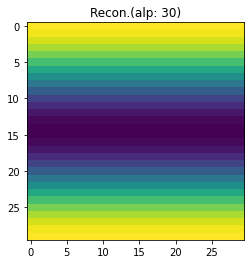

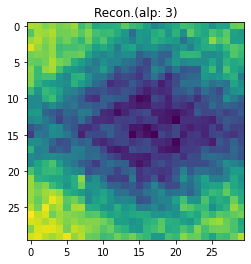

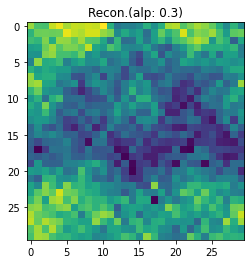

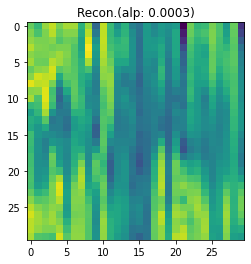

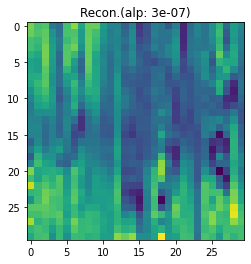

In [261]:
alpha_list = [30, 3, .3, .0003, .0000003]

for alp in alpha_list:
    # Generate random indexes and find corresponding y value for each index
    rand_index = np.random.permutation(cn * cm)[:classical_samp]
    classical_Y = classical_arr.flatten()[rand_index]
    classical_Y = classical_Y.reshape(classical_samp, 1)

    # Generate C matrix
    C = np.eye(cn * cm)[rand_index, :] * np.sqrt(cn * cm)
    C3D = C.reshape(classical_samp, cn, cm)
    theta, classical_reform, s = compress(C3D, classical_Y, alp)

    plt.imshow(classical_reform)
    plt.title("Recon.(alp: " + str(alp) + ")")
    plt.show()

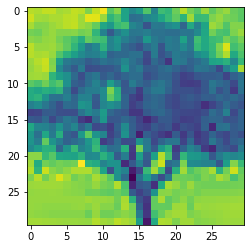

In [104]:
# Preparation for sampling index images
subplot = np.zeros(cn*cm)
for i in range (len(subplot)):
    if (i in rand_index):
        subplot[i] = 1
subplot = subplot.reshape(n, m)     
subplot.shape

subplot_x = []
subplot_y = []
for i in range(cn):
    for j in range(cm):
        if subplot[i][j] == 1:
            subplot_y.append(i)
            subplot_x.append(j)
            
plt.imshow(classical_arr)
# plt.scatter(subplot_x, subplot_y, color = 'red', marker = '.')
plt.show()

In [120]:
opt_hyperparams(params_df)

,Unnamed: 0,repetition,num_cell,cell_size,sparse_freq,alpha,error
1564,1564,8,500,7,2,0.01,12.274121


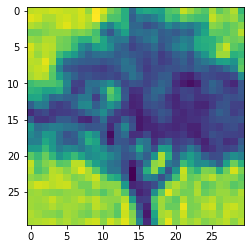

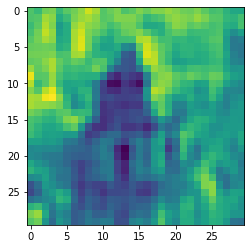

In [129]:
img_list1 = ["image/tree_part1.jpg", "image/city_part2.png"]


for im in img_list1:
    img = Image.open(im)
    img = ImageOps.grayscale(img)
    img_arr = np.asarray(img)

    # V1 Variables
    num_cell = 500
    cell_size = 7
    sparse_freq = 2
    dim = img_arr.shape
    n,m = dim

    W = V1_weights(num_cell, dim, cell_size, sparse_freq) 
    y = generate_Y(W, img_arr)
    W_rev = W.reshape(num_cell, n, m)
    theta, reform, s = compress(W_rev, y, 0.01)
    plt.imshow(reform)
    plt.show()

In [300]:
# Classical Method
tree_img = Image.open("image/tree_part1.jpg")
tree_img = ImageOps.grayscale(tree_img)
tree_img_arr = np.asarray(tree_img)

city_img = Image.open("image/city_part2.png")
city_img = ImageOps.grayscale(city_img)
city_img_arr = np.asarray(city_img)

# V1 Optimized Variables
classical_samp = 100
dim = tree_img_arr.shape
n, m = dim
alp = 0.003

rand_index_tree = np.random.permutation(n * m)[:classical_samp]
classical_Y_tree = tree_img_arr.flatten()[rand_index_tree]
classical_Y_tree = classical_Y_tree.reshape(classical_samp, 1)

rand_index_city = np.random.permutation(n * m)[:classical_samp]
classical_Y_city = city_img_arr.flatten()[rand_index_city]
classical_Y_city = classical_Y_city.reshape(classical_samp, 1)

# Generate C matrix for tree
C_tree = np.eye(n * m)[rand_index_tree, :] #* np.sqrt(n * m)
C3D_tree = C_tree.reshape(classical_samp, n, m)

# Generate C matrix for city
C_city = np.eye(n * m)[rand_index_city, :] #* np.sqrt(n * m)
C3D_city = C_city.reshape(classical_samp, n, m)



# Fetch into function
theta_tree, classical_recons_tree, s_tree = compress(C3D_tree, classical_Y_tree, alp)
theta_city, classical_recons_city, s_city = compress(C3D_city, classical_Y_city, alp)

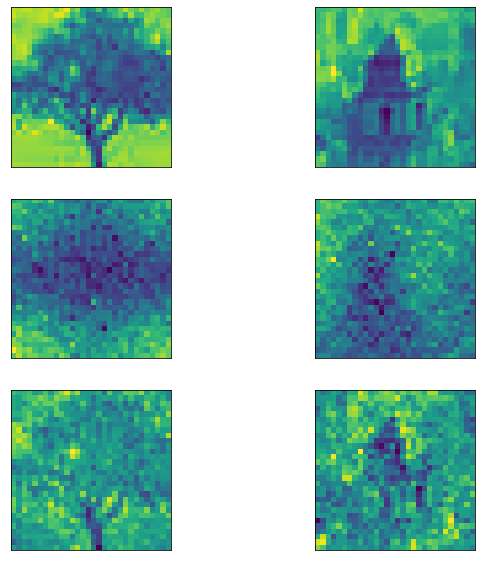

In [301]:
# Show Original/Reconstructed image
fig = plt.figure(figsize = (10, 10))

ax = fig.add_subplot(3, 2, 1)
plt.imshow(tree_img)
axes = plt.gca()
axes.get_xaxis().set_visible(False)
axes.get_yaxis().set_visible(False)

ax = fig.add_subplot(3, 2, 2)
plt.imshow(city_img)
axes = plt.gca()
axes.get_xaxis().set_visible(False)
axes.get_yaxis().set_visible(False)

ax = fig.add_subplot(3, 2, 3)
plt.imshow(classical_recons_tree)
axes = plt.gca()
axes.get_xaxis().set_visible(False)
axes.get_yaxis().set_visible(False)

ax = fig.add_subplot(3, 2, 4)
plt.imshow(classical_recons_city)
axes = plt.gca()
axes.get_xaxis().set_visible(False)
axes.get_yaxis().set_visible(False)

ax = fig.add_subplot(3, 2, 5)
plt.imshow(tree_img_arr - classical_recons_tree)
axes = plt.gca()
axes.get_xaxis().set_visible(False)
axes.get_yaxis().set_visible(False)

ax = fig.add_subplot(3, 2, 6)
plt.imshow(city_img_arr - classical_recons_city)
axes = plt.gca()
axes.get_xaxis().set_visible(False)
axes.get_yaxis().set_visible(False)



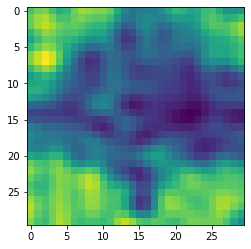

In [251]:
# V1 Methods
tree_img = Image.open("image/tree_part1.jpg")
tree_img = ImageOps.grayscale(tree_img)
tree_img_arr = np.asarray(tree_img)

city_img = Image.open("image/city_part2.png")
city_img = ImageOps.grayscale(city_img)
city_img_arr = np.asarray(city_img)

# V1 Optimized Variables
num_cell = 100
cell_size = 7
sparse_freq = 2
dim = img_arr.shape
n,m = dim
alp = 1

W = V1_weights(num_cell, dim, cell_size, sparse_freq) 
y_tree = generate_Y(W, tree_img_arr)
y_city = generate_Y(W, city_img_arr)
W_rev = W.reshape(num_cell, n, m)
theta_tree, recons_tree, s_tree = compress(W_rev, y_tree, alp)
theta_city, recons_city, s_city = compress(W_rev, y_city, alp)

plt.imshow(recons_tree)

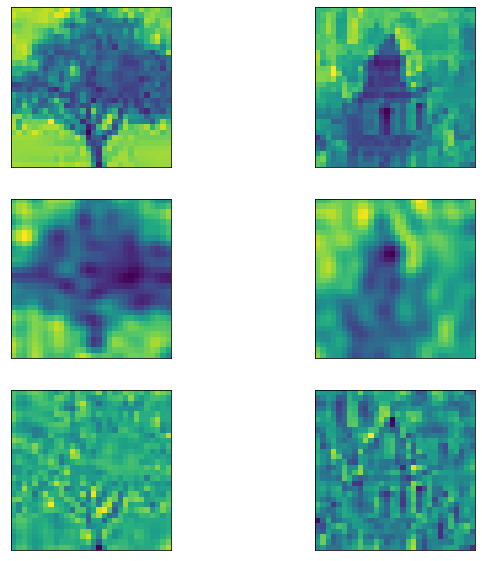

In [252]:
# Show Original/Reconstructed image
fig = plt.figure(figsize = (10, 10))

ax = fig.add_subplot(3, 2, 1)
plt.imshow(tree_img)
axes = plt.gca()
axes.get_xaxis().set_visible(False)
axes.get_yaxis().set_visible(False)

ax = fig.add_subplot(3, 2, 2)
plt.imshow(city_img)
axes = plt.gca()
axes.get_xaxis().set_visible(False)
axes.get_yaxis().set_visible(False)

ax = fig.add_subplot(3, 2, 3)
plt.imshow(recons_tree)
axes = plt.gca()
axes.get_xaxis().set_visible(False)
axes.get_yaxis().set_visible(False)

ax = fig.add_subplot(3, 2, 4)
plt.imshow(recons_city)
axes = plt.gca()
axes.get_xaxis().set_visible(False)
axes.get_yaxis().set_visible(False)

ax = fig.add_subplot(3, 2, 5)
plt.imshow(tree_img_arr - recons_tree)
axes = plt.gca()
axes.get_xaxis().set_visible(False)
axes.get_yaxis().set_visible(False)

ax = fig.add_subplot(3, 2, 6)
plt.imshow(city_img_arr - recons_city)
axes = plt.gca()
axes.get_xaxis().set_visible(False)
axes.get_yaxis().set_visible(False)



In [214]:
tree_img_arr

array([[213, 210, 216, 216, 206, 208, 216, 214, 193, 216, 233, 178, 196,
        141, 117, 134, 176, 112, 167, 160, 186, 213, 190, 177, 203, 182,
        195, 202, 185, 180],
       [220, 206, 204, 208, 208, 214, 215, 204, 228, 227, 203, 159, 174,
        142,  93,  95, 115, 122, 144, 163, 181, 158, 205, 163, 165, 193,
        201, 190, 187, 179],
       [207, 195, 196, 203, 207, 214, 216, 204, 199, 184, 145, 131, 164,
        171, 115, 105,  70, 102, 101, 117, 125,  86, 147, 109, 143, 204,
        196, 176, 195, 194],
       [190, 187, 197, 202, 195, 195, 197, 189, 192, 160, 111,  75, 106,
        124, 100, 101, 108,  96,  96,  93,  93, 100,  99, 117, 146, 189,
        174, 170, 192, 203],
       [198, 194, 200, 202, 190, 180, 169, 152, 183, 172, 167, 112, 129,
        108,  94,  87, 131, 104,  95, 106, 100, 141, 101, 168, 148, 165,
        169, 191, 177, 191],
       [214, 202, 202, 204, 195, 182, 160, 132, 101, 116, 157, 112, 124,
         88,  79,  67,  91, 105,  71, 105, 101, 119,

In [215]:
classical_recons_tree

array([[ 8.09713611e+01,  7.55561910e+01,  8.14832592e+01,
         7.86237293e+01,  9.53931931e+01,  7.42829612e+01,
         1.05293208e+02,  7.73707677e+01,  5.93032153e+01,
         7.96210400e+01,  3.88711675e+01, -2.38515660e+01,
         3.36881787e+01,  6.44909121e+00, -1.58163313e+01,
        -1.18022443e+00,  3.36444216e+01, -1.41910689e+01,
         3.03755329e+01,  3.06763297e+01,  3.29465876e+01,
         7.02686706e+01,  5.43959592e+01,  4.40077544e+01,
         6.27356991e+01,  6.58390131e+01,  5.46943992e+01,
         6.80977322e+01,  5.50200877e+01,  4.40555721e+01],
       [ 5.24344338e+01,  6.71364182e+01,  7.01148946e+01,
         7.05396782e+01,  7.33884654e+01,  7.48866110e+01,
         8.04925211e+01,  6.96018764e+01,  8.62233689e+01,
         8.28753326e+01,  5.52932651e+01, -2.77757639e+01,
         2.88353064e+01,  8.31042675e+00, -3.35796647e+01,
        -3.74098863e+01, -1.66175830e+01, -1.21192702e+01,
         1.03336607e+01,  2.94150581e+01,  4.45186033e+

1. Save all the images for hyperparams, and hyperparams as well, save original image along with it
2. Try same with compress sensing
